In [3]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN,Dense
import matplotlib.pyplot as plt

In [4]:
sequence = np.array([i for i in range(1,101)])

In [5]:
window_size=3
x=[]
y=[]
for i in range(len(sequence)-window_size):
    x.append(sequence[i:i+window_size])
    y.append(sequence[i+window_size])

In [6]:
x=np.array(x)
y=np.array(y)

In [7]:
x=x.reshape((x.shape[0],x.shape[1],1))

In [9]:
model=Sequential()
model.add(SimpleRNN(50,activation='relu',input_shape=(window_size,1)))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
model.fit(x,y,epochs=200,verbose=0)

In [27]:
model.save('prediction of nexr number in range of 1 to 100 using RNN algorithm.h5')
model.save('prediction of nexr number in range of 1 to 100 using RNN algorithm.keras')
'''model.save('prediction of nexr number in range of 1 to 100 using RNN algorithm.pkl')'''

"model.save('prediction of nexr number in range of 1 to 100 using RNN algorithm.pkl')"

In [28]:
from keras.models import load_model
model = load_model('/content/prediction of nexr number in range of 1 to 100 using RNN algorithm.h5')  # Update path if uploaded elsewhere
print("✅ Model loaded successfully!")

✅ Model loaded successfully!


In [29]:
test_input=np.array([96,97,98])
test_input=test_input.reshape((1,window_size,1))
predicted_model= model.predict(test_input,verbose=0)
print(predicted_model)

[[99.33571]]


In [30]:
y_pred=model.predict(x)
print(y_pred)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step  
[[  2.9952087]
 [  4.0732546]
 [  5.1447525]
 [  6.1891103]
 [  7.2159896]
 [  8.241519 ]
 [  9.252517 ]
 [ 10.263515 ]
 [ 11.277202 ]
 [ 12.297043 ]
 [ 13.31054  ]
 [ 14.322395 ]
 [ 15.334252 ]
 [ 16.346106 ]
 [ 17.357962 ]
 [ 18.369816 ]
 [ 19.38167  ]
 [ 20.393528 ]
 [ 21.405382 ]
 [ 22.417236 ]
 [ 23.429087 ]
 [ 24.440947 ]
 [ 25.4528   ]
 [ 26.464655 ]
 [ 27.47651  ]
 [ 28.488365 ]
 [ 29.500221 ]
 [ 30.512075 ]
 [ 31.52393  ]
 [ 32.53579  ]
 [ 33.54764  ]
 [ 34.559494 ]
 [ 35.571354 ]
 [ 36.583206 ]
 [ 37.59506  ]
 [ 38.60691  ]
 [ 39.61877  ]
 [ 40.63063  ]
 [ 41.642483 ]
 [ 42.654335 ]
 [ 43.666195 ]
 [ 44.678043 ]
 [ 45.689903 ]
 [ 46.701756 ]
 [ 47.713608 ]
 [ 48.725468 ]
 [ 49.73732  ]
 [ 50.749176 ]
 [ 51.761032 ]
 [ 52.772884 ]
 [ 53.784737 ]
 [ 54.796597 ]
 [ 55.80845  ]
 [ 56.820312 ]
 [ 57.832165 ]
 [ 58.844013 ]
 [ 59.85587  ]
 [ 60.867725 ]
 [ 61.87958  ]
 [ 62.891438 ]
 [ 63.903294 ]
 [ 64.915146 ]
 [ 65.926994 ]
 [ 66.93885  ]
 

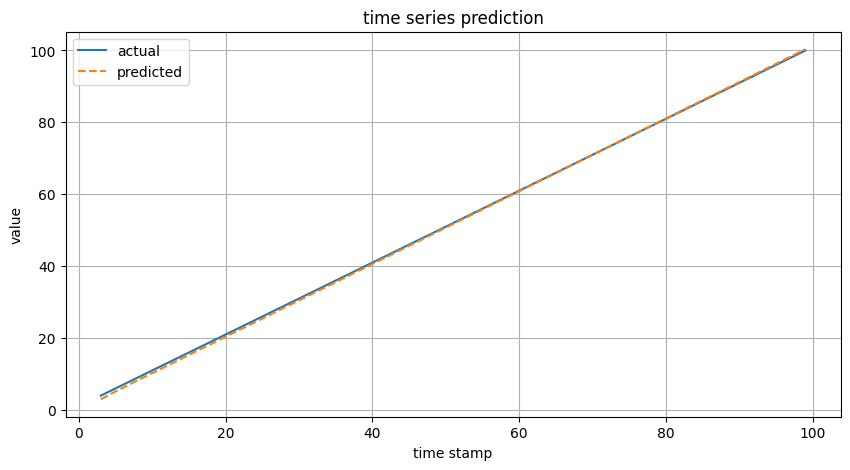

In [31]:
plt.figure(figsize=(10,5))
plt.plot(range(window_size,len(sequence)),y,label='actual')
plt.plot(range(window_size,len(sequence)),y_pred.flatten(),label='predicted',linestyle='--')
plt.title('time series prediction')
plt.xlabel('time stamp')
plt.ylabel('value')
plt.legend()
plt.grid(True)
plt.show()